In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

   area_code community_area
0          1    Rogers Park
   company_id    company
0           1  Flash Cab
         date  year  month  day  day_of_week  is_weekend
0  2025-01-01  2025      1    1            3       False
   payment_type_id payment_type
0                1       Prcard
taxi_2025-08-04.csv has been added
taxi_2025-08-05.csv has been added
taxi_2025-08-06.csv has been added
taxi_2025-08-07.csv has been added
taxi_2025-08-08.csv has been added
taxi_2025-08-09.csv has been added
taxi_2025-08-10.csv has been added
taxi_2025-08-11.csv has been added
taxi_2025-08-12.csv has been added
taxi_2025-08-13.csv has been added
taxi_2025-09-25.csv has been added
taxi_2025-09-27.csv has been added
taxi_2025-09-28.csv has been added
taxi_2025-09-29.csv has been added
taxi_2025-09-30.csv has been added
taxi_2025-10-01.csv has been added
taxi_2025-10-02.csv has been added
taxi_2025-10-03.csv has been added
taxi_2025-10-04.csv has been added
taxi_2025-10-13.csv has been added
taxi_2025-10-15.

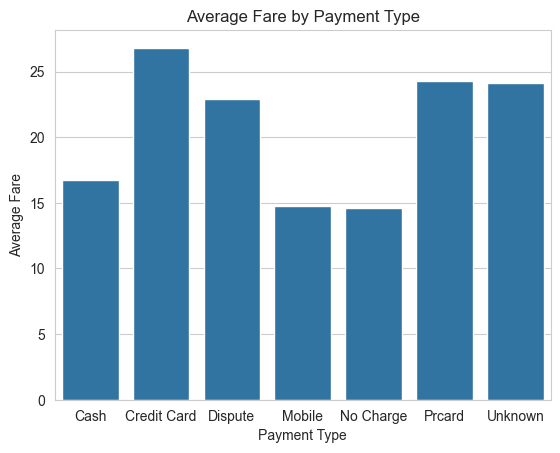

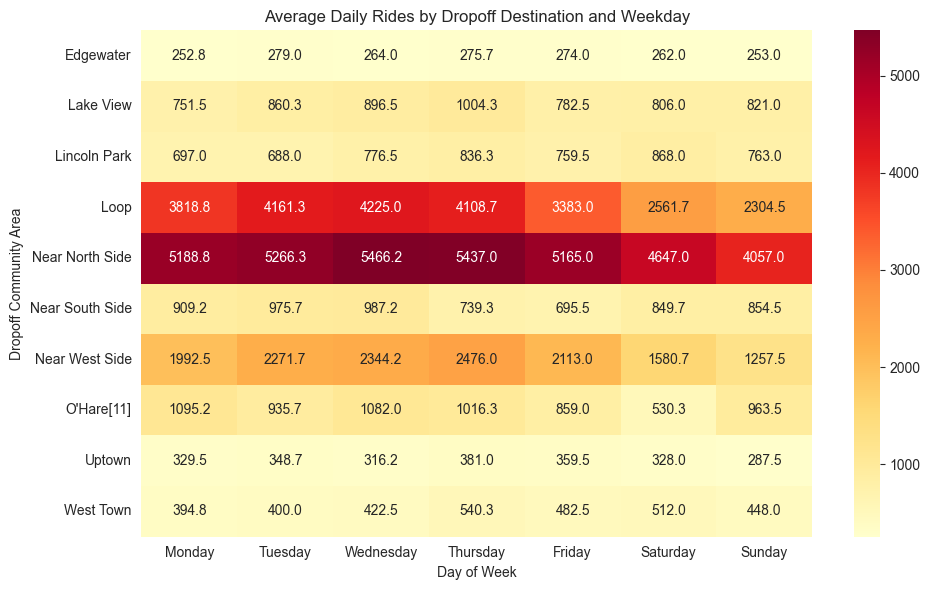

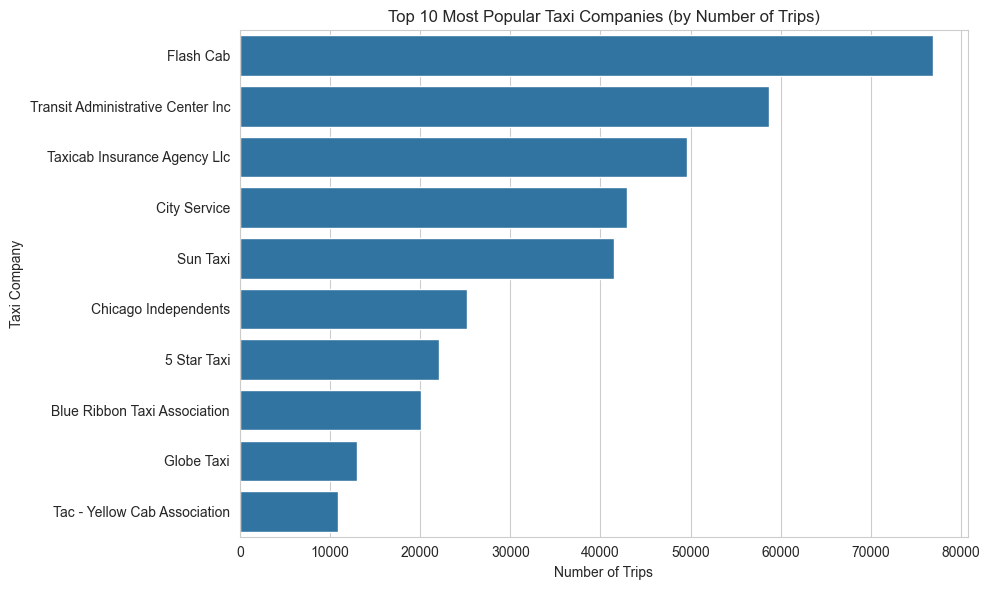

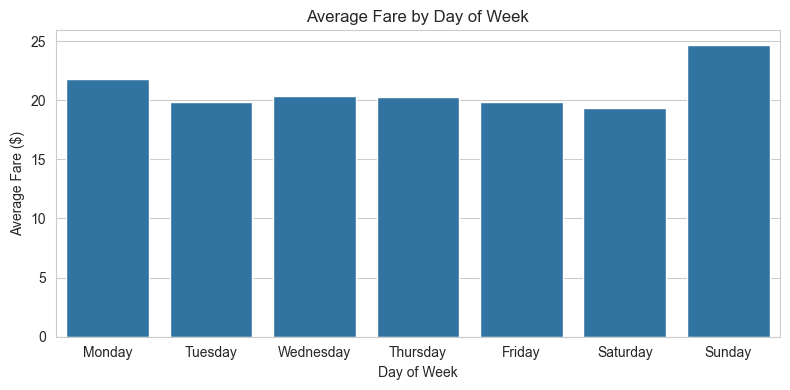

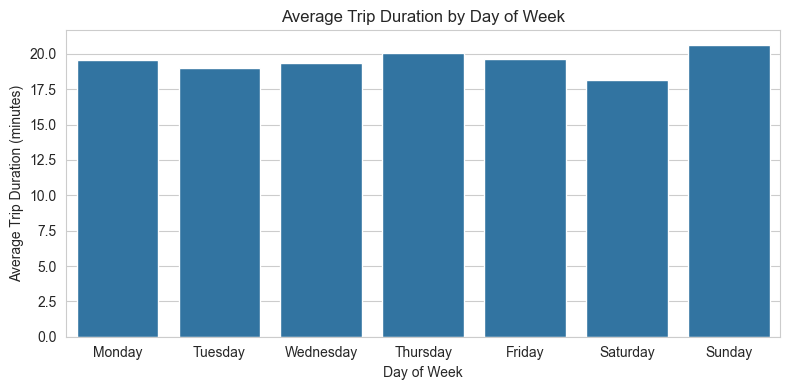

In [3]:
%run 08_create_datamodel.ipynb

In [ ]:
# Aggregate average fare per payment type
avg_fare_payment = fact_taxi_trips_full.groupby('payment_type')['fare'].mean().reset_index()

sns.barplot(data=avg_fare_payment, x='payment_type', y='fare')
plt.title('Average Fare by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Fare')
plt.show()

In [ ]:
day_map = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}
fact_taxi_trips_full['weekday'] = fact_taxi_trips_full['day_of_week'].map(day_map)

In [ ]:
daily_counts = (
    fact_taxi_trips_full.groupby([
        'dropoff_community_area_name',
        'weekday',
        'year', 'month', 'day'
    ])
    .size()
    .reset_index(name='daily_rides'))


In [ ]:
avg_daily_rides = (
    daily_counts.groupby(['dropoff_community_area_name', 'weekday'])
    ['daily_rides']
    .mean()
    .reset_index(name='avg_daily_rides')
)

In [ ]:
top_destinations = (
    avg_daily_rides.groupby('dropoff_community_area_name')['avg_daily_rides']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

filtered = avg_daily_rides[
    avg_daily_rides['dropoff_community_area_name'].isin(top_destinations)
]

In [ ]:
heatmap_data = filtered.pivot(
    index='dropoff_community_area_name',
    columns='weekday',
    values='avg_daily_rides'
)

heatmap_data = heatmap_data[
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
     'Friday', 'Saturday', 'Sunday']
]

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.1f',
    cmap='YlOrRd'
)

plt.title('Average Daily Rides by Dropoff Destination and Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Dropoff Community Area')
plt.tight_layout()
plt.show()

In [ ]:
company_counts = (
    fact_taxi_trips_full.groupby('company')['trip_id']
      .count()
      .reset_index(name='number_of_trips')
      .sort_values('number_of_trips', ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=company_counts,
    x='number_of_trips',
    y='company'
)

plt.title('Top 10 Most Popular Taxi Companies (by Number of Trips)')
plt.xlabel('Number of Trips')
plt.ylabel('Taxi Company')
plt.tight_layout()
plt.show()

In [ ]:
day_map = {
    1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday',
    6: 'Saturday', 7: 'Sunday'
}

fact_taxi_trips_full['weekday'] = fact_taxi_trips_full['day_of_week'].map(day_map)

# Average fare per weekday
avg_fare_by_day = (
    fact_taxi_trips_full.groupby('weekday')['fare']
      .mean()
      .reindex([
          'Monday', 'Tuesday', 'Wednesday',
          'Thursday', 'Friday', 'Saturday', 'Sunday'
      ])
      .reset_index()
)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=avg_fare_by_day,
    x='weekday',
    y='fare'
)

plt.title('Average Fare by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare ($)')
plt.tight_layout()
plt.show()

In [ ]:
day_map = {
    1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday',
    6: 'Saturday', 7: 'Sunday'
}

fact_taxi_trips_full['weekday'] = fact_taxi_trips_full['day_of_week'].map(day_map)

avg_duration = (
    fact_taxi_trips_full.groupby('weekday')['trip_seconds']
      .mean()
      .reindex([
          'Monday', 'Tuesday', 'Wednesday',
          'Thursday', 'Friday', 'Saturday', 'Sunday'
      ])
      .reset_index()
)

avg_duration['duration_minutes'] = avg_duration['trip_seconds'] / 60

plt.figure(figsize=(8, 4))
sns.barplot(
    data=avg_duration,
    x='weekday',
    y='duration_minutes'
)

plt.title('Average Trip Duration by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Trip Duration (minutes)')
plt.tight_layout()
plt.show()